In [1]:
!python3 save_data_to_csv.py FB daily

FB daily
             1. open  2. high    3. low  4. close   5. volume
date                                                         
2021-01-27  282.5300   283.45  268.1201    272.14  35346194.0
2021-01-26  278.1398   285.39  277.8100    282.05  19373636.0
2021-01-25  278.1400   280.10  271.5100    278.01  19086990.0
2021-01-22  272.0100   278.47  272.0000    274.50  21954042.0
2021-01-21  269.2600   273.60  267.4901    272.87  20838687.0
2021-01-20  268.9300   270.32  263.6000    267.48  25199919.0
2021-01-19  256.9000   262.20  252.7201    261.10  28028546.0
2021-01-15  247.9000   253.86  247.1600    251.36  24942930.0
2021-01-14  253.4000   255.03  244.6100    245.64  29739404.0
2021-01-13  251.5500   253.95  249.2000    251.64  19528938.0


In [44]:
!python3 tech_ind_model.py

2021-01-28 08:16:34.762179: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-28 08:16:34.762252: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
(1922, 50, 5)
(214, 50, 5)
2021-01-28 08:16:37.325724: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-28 08:16:37.326024: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-28 08:16:37.326192: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-28 08:16:37.326245: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver doe

In [2]:
import numpy as np
from keras.models import load_model
from util import csv_to_dataset, history_points

model = load_model('technical_model.h5')

ohlcv_histories, technical_indicators, next_day_open_values, unscaled_y, y_normaliser = csv_to_dataset('MSFT_daily.csv')

test_split = 0.9
n = int(ohlcv_histories.shape[0] * test_split)

ohlcv_train = ohlcv_histories[:n]
tech_ind_train = technical_indicators[:n]
y_train = next_day_open_values[:n]

ohlcv_test = ohlcv_histories[n:]
tech_ind_test = technical_indicators[n:]
y_test = next_day_open_values[n:]

unscaled_y_test = unscaled_y[n:]

y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

buys = []
sells = []
thresh = 0.1

start = 0
end = -1

x = -1

# import matplotlib.pyplot as plt

# plt.gcf().set_size_inches(22, 15, forward=True)

# real = plt.plot(unscaled_y_test[start:end], label='real')
# pred = plt.plot(y_test_predicted[start:end], label='predicted')

# plt.legend(['Real', 'Predicted'])

# plt.show()


<AxesSubplot:xlabel='Date'>

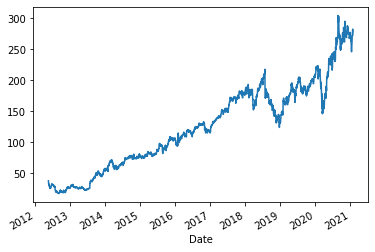

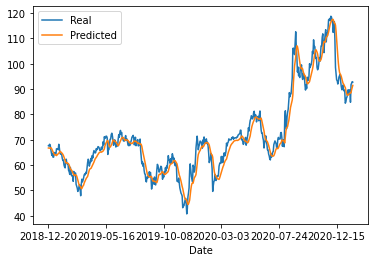

In [5]:
import pandas as pd
from yfinance import yfinance as yf
msft = yf.Ticker("FB")
# get stock info
msft.info
# get historical market data
hist = msft.history(period="max")
hist['Close'].plot(y="Close", use_index=True)




data = pd.read_csv('FB_daily.csv')['date'].tolist()
dates = data[0:len(unscaled_y_test[start:end])]
dates.reverse()
dataframe = {'Date': dates,
        'Real': [x[0] for x in unscaled_y_test[start:end].tolist()],
        'Predicted': [x[0] for x in y_test_predicted[start:end].tolist()]}
df = pd.DataFrame(dataframe, columns=['Date', 'Real', 'Predicted'])
df.plot(x ='Date', y=['Real', 'Predicted'], kind = 'line')